In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adults = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header = None,)

In [3]:
adults.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adults.columns = ["Age","Work_class","fnlwgt","Education","Education_num","Maritial_status","Occupation",
                 "Relationship","Race","Sex","Capital_gain","Capital_loss","hpw","native_country","Class"]

In [5]:
adults["Class"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
adults["Class"] = adults["Class"].map({' <=50K':0,' >50K':1})

In [7]:
for i in adults.columns:
    print("{} -- has : {} unique values which are :\n {}".format((i), adults[i].nunique(), adults[i].unique()),"\n")

Age -- has : 73 unique values which are :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45 22
 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68 66 51
 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86 87] 

Work_class -- has : 9 unique values which are :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt -- has : 21648 unique values which are :
 [ 77516  83311 215646 ...,  34066  84661 257302] 

Education -- has : 16 unique values which are :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education_num -- has : 16 unique values which are :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Maritial_status -- has : 7 unique values which are :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Ma

In [8]:
categorical_columns = adults.columns[adults.dtypes!=np.int64]
categorical_columns

Index(['Work_class', 'Education', 'Maritial_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'native_country'],
      dtype='object')

In [9]:
# for i in categorical_columns:
#     adults[i] = adults[i].str.replace("\?","Nan")

In [10]:
adults.loc[:,categorical_columns].head(1)

,Work_class,Education,Maritial_status,Occupation,Relationship,Race,Sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States


In [11]:
maritial = adults.groupby("Maritial_status")["Class"].value_counts().unstack()

In [12]:
maritial.head()

Class,0,1
Maritial_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491


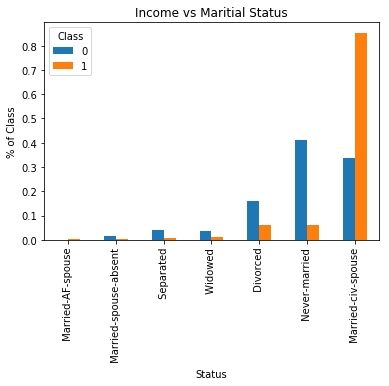

In [13]:
pd.crosstab(index =adults[ "Maritial_status"],columns = adults["Class"],
            normalize = "columns",
            margins = False,
            values=adults.Sex,
            aggfunc = "count").sort_values(1).plot(kind = "bar")
plt.title("Income vs Maritial Status")
plt.xlabel("Status")
plt.ylabel("% of Class")

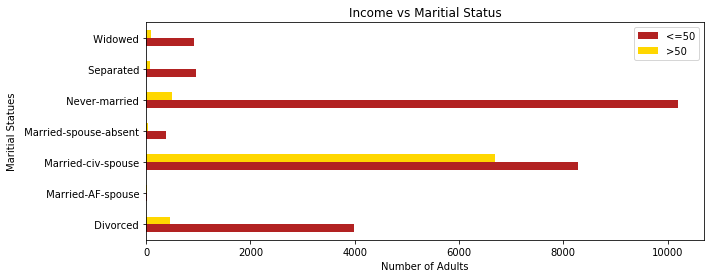

In [14]:
maritial.columns = ["<=50",">50"]
maritial.plot(kind = "barh",label =["<=50",">50"],color = ["firebrick","gold"],figsize = (10,4))
plt.legend()
plt.ylabel("Maritial Statues")
plt.xlabel("Number of Adults")
plt.title("Income vs Maritial Status")

In [15]:
for i in categorical_columns:
    adults[i] = adults[i].str.replace(" ","")

In [16]:
adults.groupby(["Sex","Maritial_status"])["Class"].value_counts().unstack().index

MultiIndex(levels=[['Female', 'Male'], ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]],
           names=['Sex', 'Maritial_status'])

In [17]:
female_mar = adults.groupby(["Sex","Maritial_status"])["Class"].value_counts().unstack().loc["Female"]
male_mar = adults.groupby(["Sex","Maritial_status"])["Class"].value_counts().unstack().loc["Male"]

In [18]:
MS = adults.groupby(["Maritial_status"])["Class"].value_counts().unstack()
MSP = MS.div(MS.sum(1),0)
MSP.columns = ["<=$50K",">$50K"]

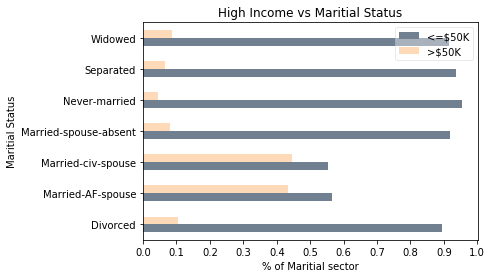

In [19]:
p = MSP.plot(kind = "barh", color = ["slategray","peachpuff"])
t = p.get_yticklabels()
plt.xticks(np.arange(0,1.1,0.1));
plt.ylabel("Maritial Status")
plt.xlabel("% of Maritial sector")
plt.title("High Income vs Maritial Status")
plt.legend(loc = "upper right")
plt.legend(framealpha = 0.4)


In [20]:
for i in t:
    print(i)

Text(0,0,'Divorced')
Text(0,1,'Married-AF-spouse')
Text(0,2,'Married-civ-spouse')
Text(0,3,'Married-spouse-absent')
Text(0,4,'Never-married')
Text(0,5,'Separated')
Text(0,6,'Widowed')


In [21]:
Labels = []
for i in list(female_mar.index):
    Labels.append(i)
    
Labels

['Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed']

In [22]:
labels = {}
for i,n in enumerate(female_mar.index):
    labels[i+1] = n
labels

{1: 'Divorced',
 2: 'Married-AF-spouse',
 3: 'Married-civ-spouse',
 4: 'Married-spouse-absent',
 5: 'Never-married',
 6: 'Separated',
 7: 'Widowed'}

In [23]:
labels[4]="Absent Spouse"

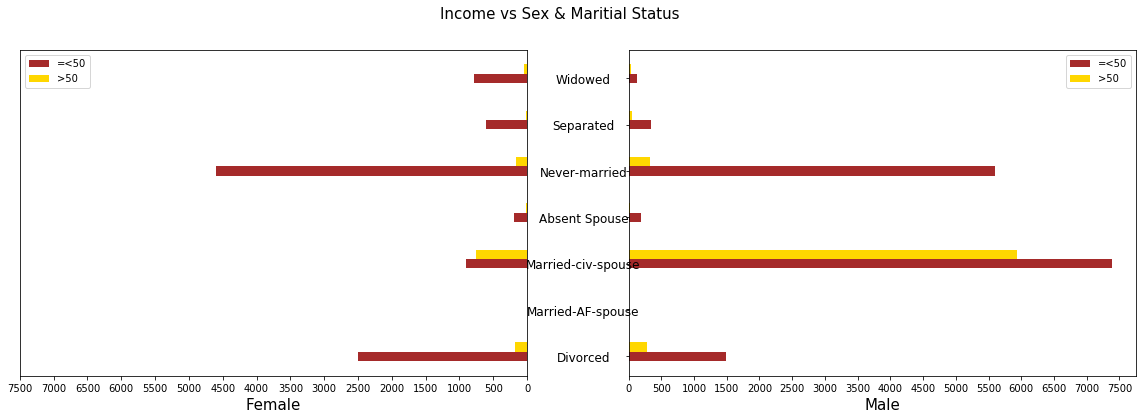

In [24]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2,figsize = (20,6),sharex = False,sharey =False)
# fig.subplots_adjust(hspace =1)
# we dont need to pass on the actual y values to tick just yet , we can add range of integers and change the label later

bottm = list(labels.keys())
              
ax_left.barh(bottom = bottm,
             width =female_mar[0],
             height = 0.2,
             align='center',
             facecolor='brown',
             label = "=<50")

ax_left.barh(bottom = [i+0.2 for i in bottm],
             width =female_mar[1],
             height = 0.2,
             align='center',
             facecolor='gold',
             label = ">50")



ax_left.set_yticks([])
# ax_left.set_ylabel(Labels)
ax_left.invert_xaxis()


ax_right.barh(bottom = bottm,
             width = male_mar[0],
             height = 0.2,
             align = "center",
             facecolor = "brown",
             label = "=<50")

ax_right.barh(bottom = [i+0.2 for i in bottm],
             width = male_mar[1],
             height = 0.2,
             align = "center",
             facecolor = "gold",
             label = ">50")
ax_right.legend()
ax_left.legend()

ax_right.set_xticks(range(0,8000,500))
ax_left.set_xticks(range(0,8000,500))
ax_right.set_yticks(range(1,8))
# x moves tick labels relative to left edge of axes in axes units
ax_right.set_yticklabels(labels.values(),ha='center', x=-0.075,y = -0.2,rotation = 0, size =12);
# ax_right.set_xlabel('Male')
ax_right.set_xlabel("Male",size = 15)
ax_left.set_xlabel("Female",size = 15)
fig.suptitle("Income vs Sex & Maritial Status",size =15)


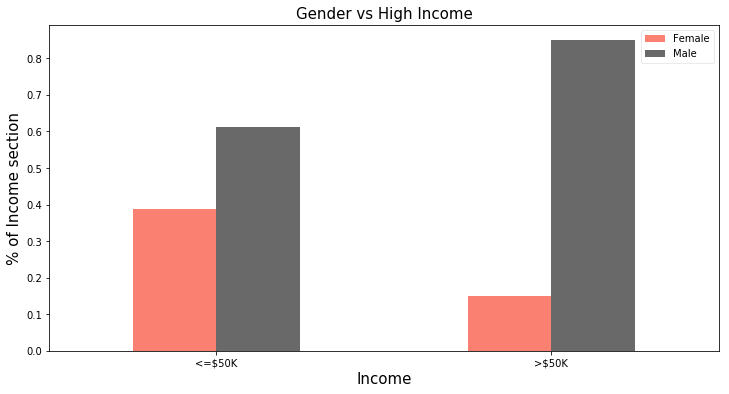

In [25]:
gen = adults.groupby("Class")["Sex"].value_counts().unstack()
gen = gen.div(gen.sum(1),0)
gen.index =["<=$50K",">$50K"]
gen.plot(kind= "bar", rot = 0, color =["salmon","dimgrey"],figsize = (12,6))
plt.title("Gender vs High Income", size = 15)
plt.xlabel("Income", size = 15)
plt.ylabel("% of Income section", size = 15)
plt.legend(framealpha = 0.4)

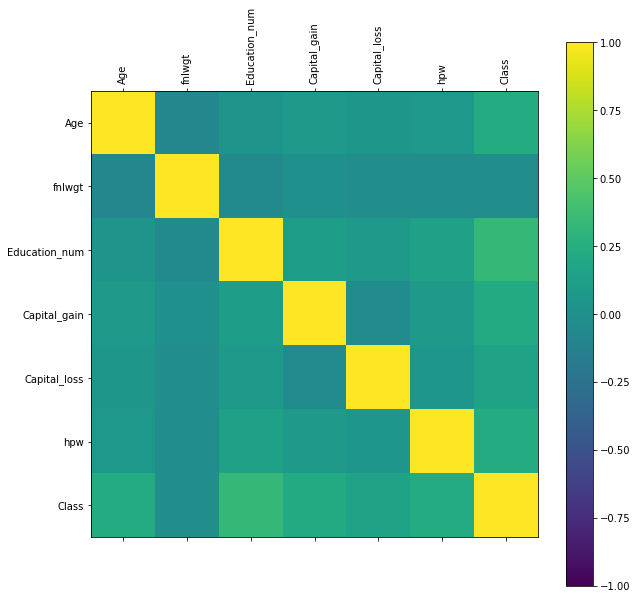

In [26]:
#Visualising the correlation between the numercial values


names = list(adults.corr().columns)
correlations = adults.corr()
# plot correlation matrix
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation = 90)
ax.set_yticklabels(names)
plt.show()

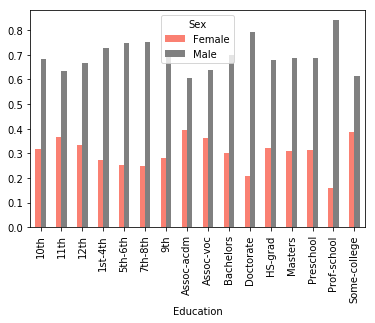

In [27]:
ed_sex = adults.groupby("Education").Sex.value_counts().unstack()
ed_sex = ed_sex.div(ed_sex.sum(1),0)
ed_sex.plot(kind = "bar", color = ["Salmon","grey"])

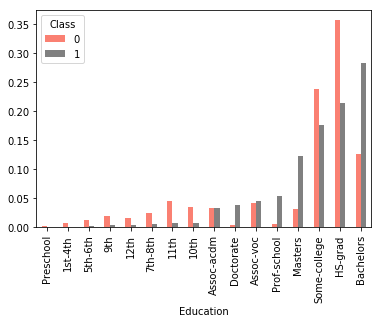

In [28]:
ed = adults.groupby("Education")["Class"].value_counts().unstack().fillna(0)
ed = ed.sort_values(1)
ed.div(ed.sum(0),1).plot(kind = "bar", color = ["Salmon","grey"])

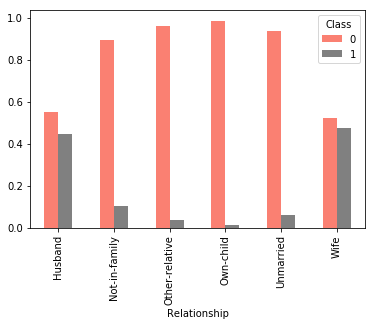

In [29]:
rel = adults.groupby("Relationship")["Class"].value_counts().unstack()
rel.div(rel.sum(1),0).plot(kind = "bar", color = ["salmon","grey"])

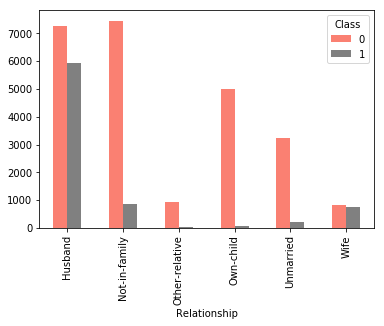

In [30]:
rel.plot(kind = "bar", color = ["salmon","grey"])

In [31]:
list(range(adults.Race.nunique()+1))

[0, 1, 2, 3, 4, 5]

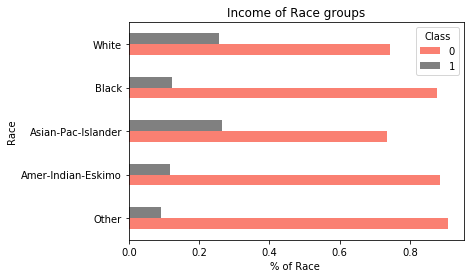

In [32]:
rac = adults.groupby("Race")["Class"].value_counts().unstack().sort_values(1)
rac.div(rac.sum(1),0).plot(kind = "barh", color= ["salmon","grey"])
plt.title("Income of Race groups")
plt.xlabel("% of Race ")
plt.ylabel("Race")


In [33]:
adults.groupby("native_country")["Class"].value_counts().unstack().sort_values(1).head()

Class,0,1
native_country,,
Honduras,12.0,1.0
Nicaragua,32.0,2.0
Peru,29.0,2.0
Trinadad&Tobago,17.0,2.0
Columbia,57.0,2.0


In [34]:
numerical_columns = adults.columns[adults.dtypes == np.int64]
numerical_columns = numerical_columns.drop("Class")
numerical_columns

Index(['Age', 'fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'hpw'],
      dtype='object')

In [35]:
for col in categorical_columns:
    print("{} has {} unique values:\n which are :\n {}".format(col, adults[col].nunique(), set(adults[col].unique())))

Work_class has 9 unique values:
 which are :
 {'Private', '?', 'State-gov', 'Never-worked', 'Self-emp-not-inc', 'Self-emp-inc', 'Without-pay', 'Federal-gov', 'Local-gov'}
Education has 16 unique values:
 which are :
 {'Assoc-acdm', 'Assoc-voc', '5th-6th', 'HS-grad', '7th-8th', 'Preschool', 'Doctorate', '9th', 'Masters', '1st-4th', '10th', 'Some-college', 'Bachelors', '11th', '12th', 'Prof-school'}
Maritial_status has 7 unique values:
 which are :
 {'Divorced', 'Married-AF-spouse', 'Widowed', 'Married-spouse-absent', 'Separated', 'Never-married', 'Married-civ-spouse'}
Occupation has 15 unique values:
 which are :
 {'Craft-repair', 'Sales', 'Farming-fishing', 'Tech-support', '?', 'Transport-moving', 'Other-service', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces', 'Machine-op-inspct', 'Exec-managerial', 'Adm-clerical', 'Prof-specialty', 'Handlers-cleaners'}
Relationship has 6 unique values:
 which are :
 {'Own-child', 'Husband', 'Wife', 'Not-in-family', 'Unmarried', 'Other-relative'

In [36]:
dummy = pd.get_dummies(adults[categorical_columns],drop_first=True)
dummy.head()

,Work_class_Federal-gov,Work_class_Local-gov,Work_class_Never-worked,Work_class_Private,Work_class_Self-emp-inc,Work_class_Self-emp-not-inc,Work_class_State-gov,Work_class_Without-pay,Education_11th,Education_12th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
adults[numerical_columns] = sc.fit_transform(adults[numerical_columns])

In [38]:
adults[numerical_columns].head()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,hpw
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [39]:
data = pd.concat([dummy,adults[numerical_columns],adults["Class"]], axis = 1)

In [40]:
X = data.iloc[: , :-1].values
y = data.iloc[:,-1].values

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

c1 = KNeighborsClassifier(n_neighbors=1)
c2 = RandomForestClassifier(random_state=1)
c3 = GaussianNB()
c4 = SVC()
lr = LogisticRegression()


for c , label in zip([c1,c2,c3,c4],["KNN","RandomForest","Naive Bayes","Support Vector Machine"]):
    scores = cross_val_score(c, X, y , cv = 3, scoring = "accuracy")
    print("accuracy {} +/- {} [{}]".format(scores.mean() , scores.std(), label))

accuracy 0.8014189494822662 +/- 0.0025677997025294486 [KNN]
accuracy 0.8462884685200729 +/- 0.0010725973236293852 [RandomForest]
accuracy 0.48693162620974345 +/- 0.03332009017352423 [Naive Bayes]
accuracy 0.8526766107806513 +/- 0.0038549657632717853 [Support Vector Machine]


In [42]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.15 , random_state = 42)

In [43]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=100 , max_depth=2)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
score

C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.86079836233367446

In [44]:
x_score = cross_val_score(classifier , X, y , scoring="accuracy", cv = 10)
print(x_score.mean(),"+/-",x_score.std() )

0.858204875683 +/- 0.00479674905434


In [45]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations=5,population_size=60,verbosity=2,max_time_mins=2)
tpot_classifier.fit(X,y)

TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: GradientBoostingClassifier(RFE(input_matrix, RFE__ExtraTreesClassifier__criterion=entropy, RFE__ExtraTreesClassifier__max_features=0.35, RFE__ExtraTreesClassifier__n_estimators=100, RFE__step=0.6), GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.9, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=18, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        generations=1000000, max_eval_time_mins=5, max_time_mins=2,
        mutation_rate=0.9, n_jobs=1, offspring_size=60, population_size=60,
        random_state=None, scoring=None, subsample=1.0, verbosity=2,
        warm_start=False)

In [47]:
tpot_classifier.score(X_test,y_test)

0.91136131013306043

In [48]:
tpot_classifier.export("Adults_Ml.py")

In [50]:
# %load Adults_ML.py
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# NOTE: Make sure that the class is labeled 'class' in the data file
# tpot_data = np.recfromcsv('PATH/TO/DATA/FILE', delimiter='COLUMN_SEPARATOR', dtype=np.float64)
# features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_target, testing_target = \
    train_test_split(X, y, random_state=42)

exported_pipeline = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.35000000000000003, n_estimators=100), step=0.6000000000000001),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=8, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=18, n_estimators=100, subsample=0.8)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
results

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [53]:
accuracy_score(testing_target, results)

0.87483110183024193

In [54]:
cross_val_score(exported_pipeline, X, y, cv = 10 , scoring = "accuracy").mean()

0.87153359537839115